### Sections

1. [Introduction](#1)
2. [What is statistical modeling?](#2)
3. [Linear correlation](#3)  
4. [Non-linear relationships](#4)   
5. [Machine Learning](#5)  
    5.1. [Linear regression](#5-1)  
    5.2. [Logistic regression](#5-2)  
    5.3. [Neural networks](#5-3)  
    5.4. [Training data vs test data](#5-4)  
    5.5. [Underfitting vs overfitting](#5-5)   
    5.6. [Other algorithms](#5-6) 

# 1. Introduction <a id='1'></a>

In this notebook we will cover the basics of statistical modeling, while working with the [Pima Indians Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). The code cell below loads the dataset into a DataFrame object, stores it in the variable `df` and then displays it.

In [1]:
import pandas as pd

DATASET_URL = "https://raw.githubusercontent.com/lazarskiopencourses/lazarskiopencourses.github.io/master/courses/introduction_to_data_analysis/datasets/diabetes.csv"
df = pd.read_csv(DATASET_URL)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Each row in this DataFrame contains some information about a person. The "Outcome" row contains information on whether or not the person has diabetes (1 means they have diabetes, while 0 means they do not). 

# 2. What is statistical modeling? <a id='2'></a>

A statistical model is a mathematical representation of a real-world phenomenon that captures the relationships between variables, and allows for predictions or inferences about the phenomenon based on observed data. For example, the variable `df` points to a dataframe, in which each row contains data corresponding to certain features of a person (number of pregnancies, blood glucose level, blood pressure etc.). We could construct a statistical model, which models the relationship between those features. Although the model would be constructed based on the sample data, it should generalize beyond the sample data with some degree of accuracy. For example, we could use a statistical model to try to predict whether someone has diabetes, based on other features, such as BMI, skin thickness, blood pressure etc. The model would not be perfect (sometimes it would classify people incorrectly), however, it would likely be better than just random guessing.

# 3. Linear correlation <a id='3'></a>

Before we explore statistical models in more depth, we'll first go over the topic of "linear correlation", which is a kind of relationship between two variables. More specifically, linear correlation is a measure of the degree to which two variables vary together and it is typically expressed with a number between -1 and 1. 

A linear correlation of 1 means a perfect positive correlation. This means that as one variable increases in value, the other variable always increases in value as well. Below is a graph depicting such a relationship between two variables (X and Y):

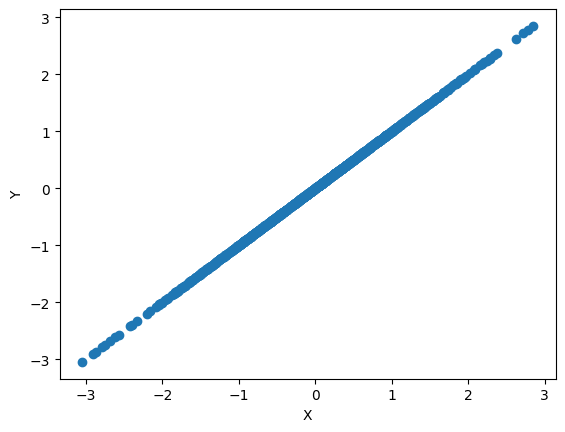

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def show_correlation(corr):
    cov_matrix = [
        [1, corr],
        [corr, 1]
    ]

    data = np.random.multivariate_normal([0, 0], cov_matrix, size=1000)

    plt.xlabel("X")
    plt.ylabel("Y")
    return plt.scatter(data[:, 0], data[:, 1])

show_correlation(1)

A correlation of 0.5 is a strong positive correlation and it looks like this:

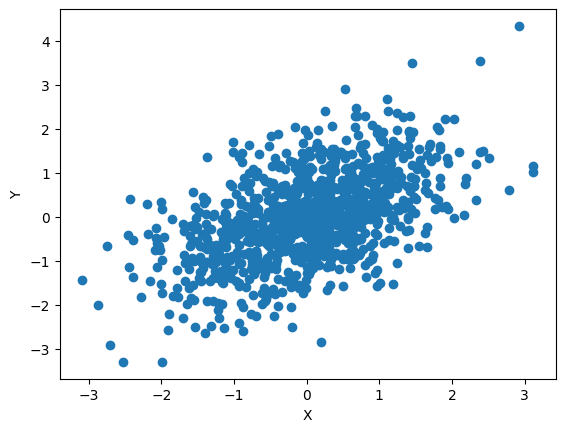

In [4]:
show_correlation(0.5)

A correlation of 0 (no correlation) looks like this:

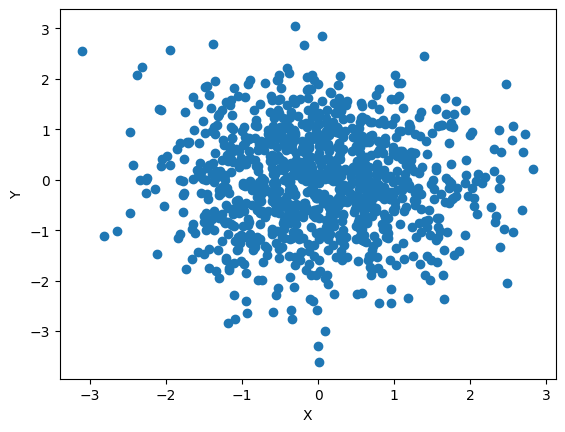

In [5]:
show_correlation(0)

A correlation of -0.5 is a strong negative correlation and it looks like this:

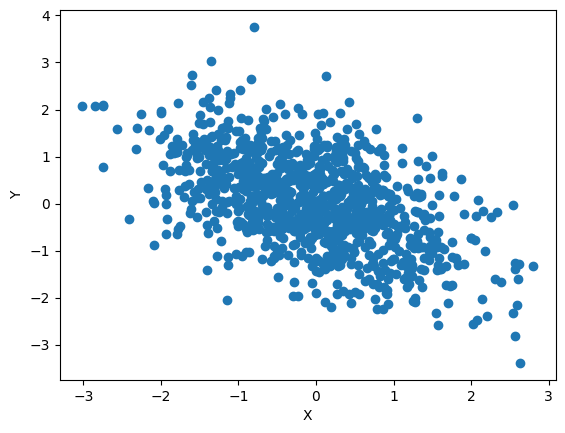

In [7]:
show_correlation(-0.5)

A correlation of -1 is a perfect negative correlation and it looks like this:

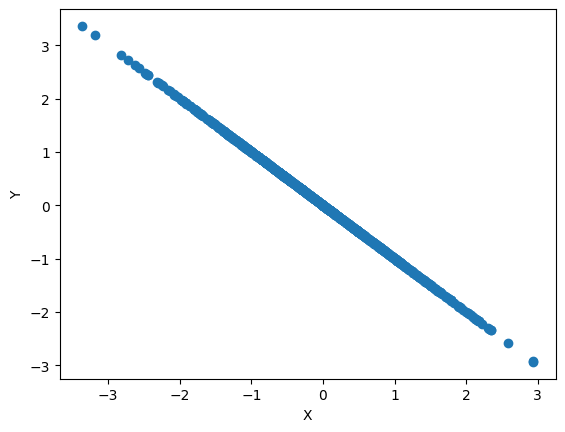

In [8]:
show_correlation(-1)

We can use the `Series.corr()` method to find the correlation between two variables. For example, the code cell below returns the correlation between the variables "Glucose" and "BloodPressure":

In [10]:
df["Glucose"].corr(df["BloodPressure"])

0.15258958656866448

We can use the `DataFrame.corr()` method to obtain a dataframe containing correlations between all columns:

In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Before we move on to the the next section, it is worth mentioning two things:

1. the `corr()` method calculates the Pearson correlation coefficient. There are other methods for calculating correlation coefficients, such as - for example - the Kendall rank correlation coefficient, which can also be calculated for ordinal variables (unlike the Pearson correlation coefficient, which can only be calculated for continuous variables)

2. Correlations also have p-values associated with them, when we are trying to determine the correlation of two variables in a population based on a sample. This is because we can ask the question: how likely were we to obtain such a correlation coefficient purely by chance (due to random sampling)? We can use the scipy library to also obtain a p-value along with the correlation coefficient:

In [15]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df["Glucose"], df["BloodPressure"])
print("corr:", corr)
print("p-value:", p_value)

corr: 0.15258958656866445
p-value: 2.1695071530224762e-05


# 4. Non-linear relationships <a id='4'></a>

Variables can also have a more complex relationship between them than a linear relationship (for which we can calculate a linear correlation coefficient). For example, two variables can be in a non-linear relationship, which can only be modeled accurately by non-linear functions. Below are some graphs, which show nonlinear relationships:

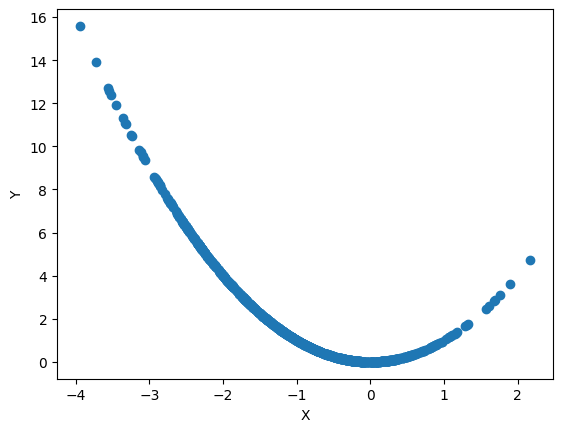

In [38]:
x = np.random.normal(-1, 1, 1000)
y = x**2

plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x, y)

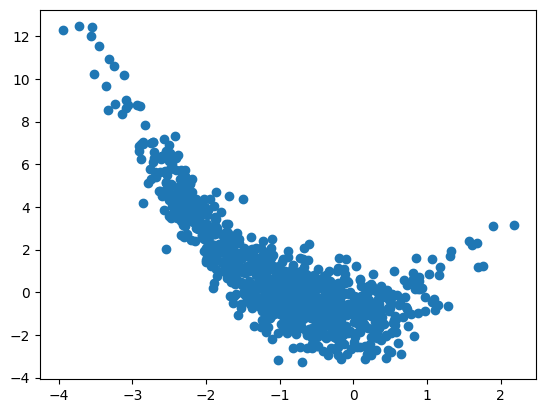

In [39]:
y = x**2 + np.random.normal(-1, 1, 1000)
plt.scatter(x, y)

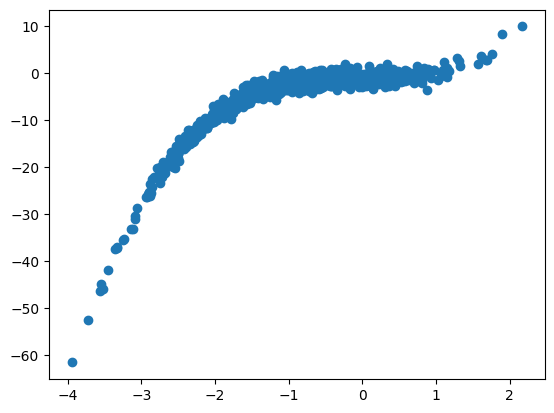

In [48]:
y = x**3 + np.random.normal(-1, 1, 1000)
plt.scatter(x, y)

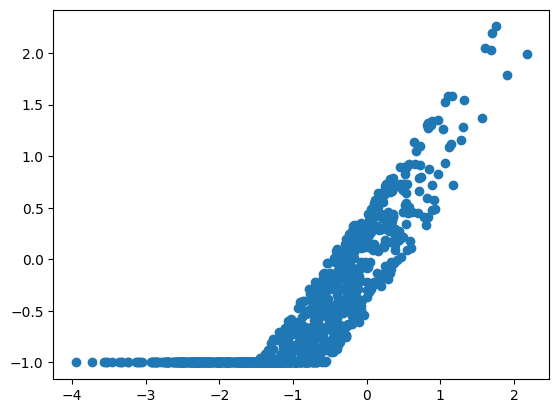

In [44]:
y = x + np.random.uniform(-0.5, 0.5, 1000)
y[y < -1] = -1
plt.scatter(x, y)

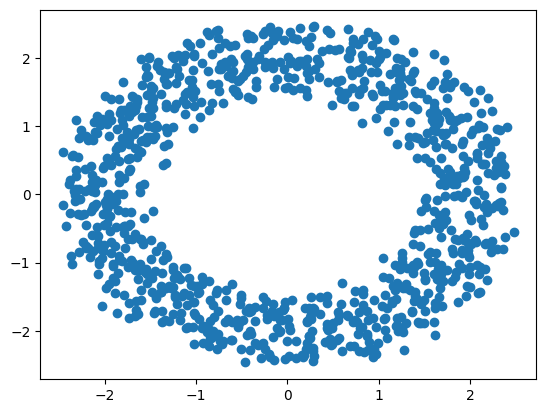

In [53]:
theta = np.linspace(0, 2 * np.pi, 1000)

radius = 2
x = radius * np.cos(theta)
y = radius * np.sin(theta)

x = x + np.random.uniform(-0.5, 0.5, len(x))
y = y + np.random.uniform(-0.5, 0.5, len(y))

plt.scatter(x, y)

# 5. Machine learning <a id='5'></a>

In the real world, there are many relationships between variables that are more complex than linear or non-linear relationships between two variables. It is often the case that groups of variables have complex relationships between them, which are difficult to uncover - this is where machine learning comes in. Machine learning can be used to discover those complex relationships based on the data we have available. For example, we may want to predict one variable based on a multitude of other variables. In the case of `df`, we may want to predict someone's blood glucose level, based on all the other columns we have available ("Pregnancies", "BloodPressure", "SkinThickness" etc.). Let's use machine learning algorithms to create a model that will allow us to make such predictions with some degree of accuracy.

The first step is to identify the target column (the variable we are trying to predict) and the predictor columns (the variables we are using to make our prediction):

In [2]:
target_column = "Glucose"
predictor_columns = df.drop(target_column, axis=1).columns

Ok, now that we have our target and predictor variables identified (sometimes also called the dependent and independent variables), we can use a type of machine learning model called linear regression, to model the relationship between our predictor variables and our target variable.

##  5.1 Linear regression <a id='5-1'></a>

Linear regression is a type of machine learning model/statistical model that models the relationship between a dependent variable and one or more independent variables, assuming a linear relationship between the variables. The goal of linear regression is to find the best-fit line that can predict the value of the dependent variable based on the values of the independent variable(s).

A linear relationship can be expressed with the formula $y = ax + b$, since this is the formula for a line (when graphed). Therefore, a linear regression model combines (via addition) the linear relationships between each independent variable and the dependent variable. The formula for linear regression is as follows:

$ y = a_1 x_1 + a_2 x_2 \, + \, ... \,+\,a_n x_n + b$

where:

1. $y$ is the dependent variable
2. $a_1$, $a_2$, ..., $a_n$ are the coefficients of the independent variables
3. $x_1$, $x_2$, ..., $x_n$ are the values of the independent variables
4. $ b $ is the intercept


The coefficients $a_1$, $a_2$, ..., $a_n$ represent the change in the value of $y$ for a unit change in the corresponding independent variable, while holding all other independent variables constant. The intercept $b$ is the value of $y$ when all independent variables are zero.

The linear regression model estimates the values of the coefficients $a_1$, $a_2$, ..., $a_n$ based on the data, using a method called Ordinary Least Squares (OLS). The method involves minimizing the sum of the squared differences between the actual values of $y$ and the predicted values of $y$, which is called the residual sum of squares (RSS).

The formula for the RSS is:

$RSS = (y_1 - \hat{y_1})^2 + (y - \hat{y_2})^2 \; + \,... \,+\; (y_n - \hat{y_n})^2$

where:

1. $y_1, y_2$, ..., $ y_n$ are the actual values of the dependent variable
2. $\hat{y_1}, \hat{y_2}$ , ..., $\hat{y_n}$ are the predicted values of the dependent variable based on the linear regression equation

The coefficients $a_1$, $a_2$, ..., $a_n$ are estimated such that the $RSS$ is minimized. This is done using a technique called ordinary least squares (OLS), which involves solving a set of equations that relate the coefficients to the values of the independent variables and the dependent variable.

Once the coefficients are estimated, the linear regression equation can be used to predict the value of the dependent variable for new values of the independent variables. Let's use the scikit-learn library to fit a linear regression model to our data:

In [3]:
!pip install scikit-learn

In [3]:
from sklearn.linear_model import LinearRegression


linreg_model = LinearRegression()
linreg_model.fit(df[predictor_columns], df[target_column])

df["prediction"] = linreg_model.predict(df[predictor_columns])

df[["Glucose", "prediction"]]

,Glucose,prediction
0,148,134.037972
1,85,100.534887
2,183,130.460517
3,89,106.045991
4,137,145.696934
...,...,...
763,101,125.382175
764,122,102.300461
765,121,110.418186
766,126,142.049669


1. The code cell above imports the `LinearRegression` class from the scikit-learn library (`sklearn`) and then creates a `LinearRegression` object and stores it in the `linreg_model` variable. 

2. Next we use the `LinearRegression.fit()` method to fit the model to our data (using our previously defined `predictor_columns` and `target_variable`.

3. Then we make predictions with our model

4. Then we display a dataframe containing the actual values for the blood glucose level and the predicted values by our model

We can check how wrong our model is on average:

In [4]:
difference = abs(df["Glucose"] - df["prediction"])
difference.mean()

19.693473540492437

With these few lines of code we have trained a linear regression model and used it to predict a continuous variable ("Glucose") based on some other variables. However, what if we want to predict a categorical variable, such as whether or not someone has diabetes. In this case we can use logistic regression, which is similar to linear regression. 

## 5.2. Logistic regression <a id='5-2'></a>

Logistic regression is also used to model the relationship between a dependent variable and one or more independent variables, and it also assumes a linear relationship between those variables. The main difference between linear regression and logistic regression is the nature of the dependent variable. In linear regression, the dependent variable is continuous, while in logistic regression, the dependent variable is categorical - typically binary (e.g., yes/no, true/false, 1/0). 

Logistic regression models the probability of the dependent variable belonging to a certain category, given the values of the independent variable(s). The logistic regression model is like a linear regression model, whose output we pass through the sigmoid function (also called the logistic function), in order to estimate the odds of the dependent variable being in one category versus the other.

The logistic function is given by:

$ P(Y = 1|X) = \Large \frac{1}{1 + e^{-z}} $

where 

1. $z$ is the linear combination of the predictor variables, which is equivalent to the output of a linear regression model: $ z = b + a_1 x_1 + a_2 x_2 + ... + a_n x_n $

2. where $ P(Y = 1|X)$ is the probability of the dependent variable being in one category. The probability of the variable belonging to the other category is calculated as: $1 - P(Y = 1|X)$.

The logistic regression model assumes that the probability of the outcome Y (0 or 1) can be expressed as a function of a linear combination of the predictor variables (X1, X2, ..., Xn), transformed by the sigmoid/logistic function. We can use an algorithm called Maximum Likelihood Estimation (MLE) to estimate the values of the coefficients that maximize the likelihood of observing the data, given the model.

Let's create a logistic regression model to predict whether or not someone has diabetes:

In [15]:
from sklearn.linear_model import LogisticRegression

target_column = "Outcome"
predictor_columns = df.drop(target_column, axis=1).columns

logreg_model = LogisticRegression(max_iter=300)
logreg_model.fit(df[predictor_columns], df[target_column])

df["prediction"] = logreg_model.predict(df[predictor_columns])
df[["Outcome", "prediction"]]

,Outcome,prediction
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
763,0,0
764,0,0
765,0,0
766,1,0


**Note:** the `max_iter` argument determines the maximum number of iterations of the optimization algorithm that attempts to quickly find the optimal parameters of the model.

Let's check the accuracy of our model:

In [16]:
correct = (df["Outcome"] == df["prediction"]).sum()
correct / len(df)

0.78515625

It seems that our model is correct around 78% of the time. Let's see if we can improve this accuracy score with another type of machine learning model - neural networks.

## 5.3.  Neural networks <a id='5-3'></a>

A neural network is a type of machine learning algorithm that can model more complex, non-linear relationships between variables. A neural network is composed of some number of layers (at least 2), each of which contains some number of neurons. The first layer is called the input layer, the last layer is called the output layer, and the layers in between are called the hidden layers. Every neuron in a layer is connected to every other neuron in the next layer (with the exception of the last layer) - these connections have a certain strength represented with numerical values, which are called the weights of a network. The diagram bellow illustrates the general structure of a neural network.

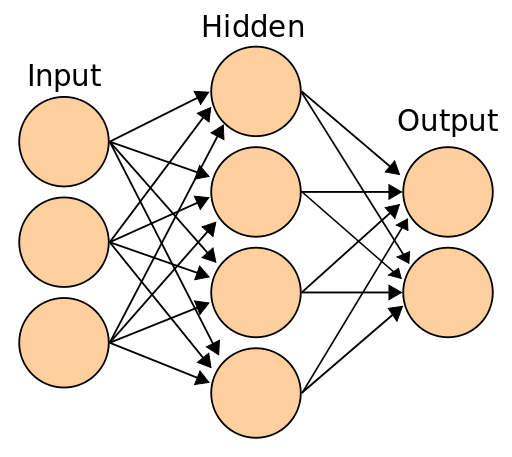

en:User:Cburnett, CC BY-SA 3.0 <http://creativecommons.org/licenses/by-sa/3.0/>, via Wikimedia Commons

A neuron is like a mathematical function that can take in some values, process them and output a single value called the activation value. The neurons in the first layer are a bit special in the sense that their activation values are simply the values of the independent variables we are trying to use to predict the dependent variable. For example, if we want to train a neural network to predict whether or not someone has diabetes based on the other variables available in `df`, our first layer will have 8 neurons corresponding to the 8 independent variables:

In [4]:
len(df.drop("Outcome", axis=1).columns)

8

We will now go over the steps to calculate the activation values of the neurons in the subsequent layers. Don't worry if you don't understand the terminology used in the outlined steps, we will go over it in greater detail in a moment. To calculate the activation values of the neurons in the subsequent layers, we have to:

1. multiply the **activation values** of the previous layer by the corresponding **weights** (which are also numerical values) and then sum the result.
2. add a constant called the **bias**
3. pass the result through some non-linear function (such as ReLu or Tanh) 

For example, if we look at the diagram above, we can see that it represents a neural network with 3 layers:

1. The first layer has 3 neurons
2. The second layer has 4 neurons
3. The third layer has 2 neurons

Let's assume the activation values of the first three neurons are `2, 4, 4`, and let's say we now want to calculate the activation value of some neuron in the second layer. In this case, we also need to know the weights of the connections between that neuron and the neurons in the first layer. Let's say the weights of the three connections are `1, -2, 0.5`. Now we have to multiply the activations of the first layer by the corresponding weights, and then sum the result:

$ (1 \cdot 2) + (4 \cdot -2) + (4 \cdot 0.5) = -4$

So the activation of this hypothetical neuron is -4. The same procedure is applied to calculate the activations of the other neurons in the second layer of our hypothetical network. Each neuron will have a different set of weights associated with it (representing the strength of the connections between that neuron and the neurons in the previous layer). In general, the formula for calculating the activation value of a neuron is as follows:

$y = w_1 x_1 + w_2 x_2 + ... + w_n x_n$, where $w_n$ are the weights, $x_n$ are the input activations of neurons in the previous layer, and $n$ is the number of weights/input activations.

You may have noticed that this is similar to the inference formula of a linear regression model - all that is missing is the $b$ constant. In fact, each neuron has a **bias** value, which is a constant that is added to the activation value of a neuron. Therefore, at this step, the formula for calculating the activation value of a single neuron (in the second layer or later layers) looks exactly the same like the inference formula of a linear:

$y = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b$ , where $w_n$ are the weights, $x_n$ are the input activations of neurons in the previous layer, $b$ is the bias (some constant) and $n$ is the number of weights/input activations.

Now we have one final detail to add - the activation function. The activation function is a non-linear function which is applied to the activation of a neuron, after we have multiplied the weights by the input activations, summed them, and added the bias. Here is a graph of the tanh function (also called the hyperbolic function):

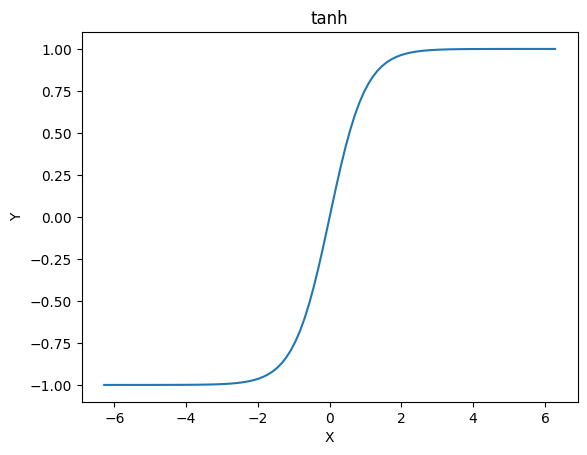

In [10]:
in_array = np.linspace(-2*np.pi, 2*np.pi, 100)
out_array = np.tanh(in_array)
  
plt.plot(in_array, out_array)
plt.title("tanh")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

As we can see the tanh function squeezes its inputs into values between -1 and 1. It necessarily does so in a non-linear way, where extremely large positive and negative values get relatively more "squished" than smaller values. There are also other functions, besides the tanh function, that can be used as the activation function in neural networks - one such example is the ReLU (rectified linear unit) function, which is like an identity function, except that it converts all negative numbers to 0.

To summarize, the output of a neuron (its activation value) is calculated by:

1. multiplying weights by inputs, then summing
2. adding bias
3. passing the result through an activation function

The diagram below illustrates this:

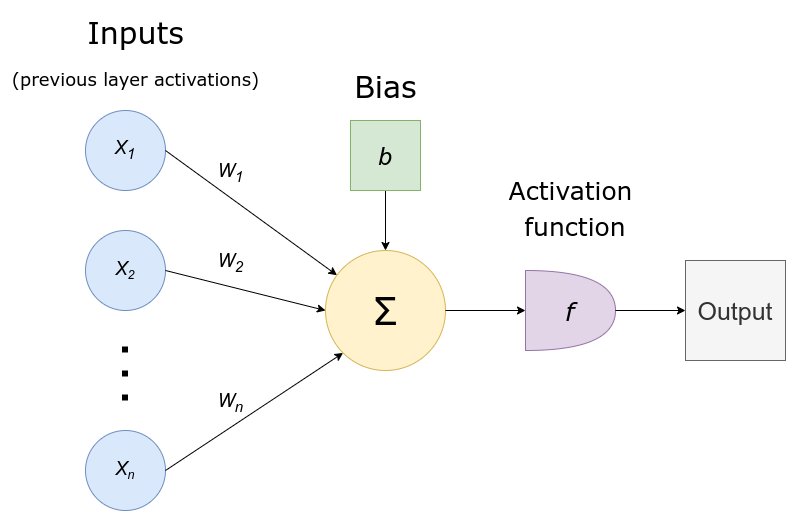

The formula for calculating the output of a neuron can be expressed in the following way:

$ y = g(b + \sum_{i=1}^{n}{w_ix_i})\;\;\;$ 

where $x_i$ are the inputs, $w_i$ are the weights, $n$ is the number of inputs/weights, $b$ is the bias, and $g$ is the activation function.

Moreover, if you are familiar with linear algebra, the weights of neurons in an entire layer can be arranged into  a matrix, where each row contains the weights associated with a single neuron. The activations of the previous layer can be expressed as a column vector, which then allows for the calculation of the current layer's activations via matrix multiplication (this may be confusing to you, if you are unfamiliar with linear algebra - specifically matrix multiplication). The formula for calculating the activations of an entire layer can be expressed in the following way:

$y = g(Wx + b)$ 

where

1. $x$ is a vector of length $n$ ($ x \in \mathbb{R}^n$), representing the inputs
2. $b$ is also a vector of length $n$ ( $b \in \mathbb{R}^n$), representing the biases
3. W is a matrix with $m$ rows and $n$ columns ($W \in \mathbb{R}^{m \times n})$, representing the weights associated with each neuron
4. $n$ is the number of neurons in the previous layer (corresponding to the number of inputs or weights per neuron)
5. $m$ is the number of neurons in the current layer
6. $g$ is the activation function

So now we know how to calculate the output of each layer, but how do we use data to train a neural network, so that it can perform useful predictions? The details of this process are beyond the scope of this course, but we will briefly go over the training process on a general level. Typically, a neural network is first initialized with random values as the weights and biases. Next it makes prediction for some samples in our dataset, and we calculate the error, which is a value that tells us how wrong the network was in this particular case. Using an algorithm called Stochastic Gradient Descent (SGD), which involves calculating the gradients of the weights and biases with respect to the error value, the weights and biases are adjusted, so that the network is less wrong (the error is minimized). This process is then repeated for every sample in the dataset (often multiple times).

Now that we've covered the basics of neural networks, let's create a 4 layer neural network using the scikit-learn library.

In [66]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(4, 4), solver="sgd", max_iter=300)

You may be wondering why the neural network class is called `MLPClassifier`. This is because neural networks can have many different architectures. The architecture covered in this notebook is the "basic" neural network architecture, which is often called a multi-layer perceptron (MLP). Since we can use neural networks for both regression and classification, the scikit-learn library has two separate classes `MLPClassifier` and `MLPRegressor`.

Another thing you may have noticed is that we only passed in an argument `hidden_layer_sizes`, which is a tuple containing 2 integers, even though we wanted to create a 4 layer neural network. This is because the sizes of the first layer (the input layer) and the last layer (the output layer) are automatically matched to our data. In this case, we will want to predict whether or not someone has diabetes, based on the other data we have about them in our dataframe `df`. More specifically, we will want to predict the value of the variable "Outcome", based on the other 8 variables. Therefore our input layer will have 8 neurons and our output layer will have 1 neuron (since we are trying to predict one value).

Now let's train the neural network:

In [67]:
target_column = "Outcome"
predictor_columns = df.drop(target_column, axis=1).columns

clf.fit(df[predictor_columns], df[target_column])
df["prediction"] = clf.predict(df[predictor_columns])
df[["Outcome", "prediction"]]

,Outcome,prediction
0,1,0
1,0,0
2,1,0
3,0,0
4,1,0
...,...,...
763,0,0
764,0,0
765,0,0
766,1,0


Let's calculate what percentage of classifications are correct:

In [68]:
correct = (df["Outcome"] == df["prediction"]).sum()
correct / len(df)

0.6614583333333334

The accuracy is not as good as in the case of the logistic regression model we trained earlier. Let's increase the number of neurons and let's see how this affects our model's accuracy:

In [115]:
def calculate_accuracy(model, df):
    predictions = clf.predict(df[predictor_columns])
    correct = (df["Outcome"] == predictions).sum()
    return correct / len(df)

clf = MLPClassifier(hidden_layer_sizes=(24, 24), max_iter=300, solver="sgd")
clf.fit(df[predictor_columns], df[target_column])
calculate_accuracy(clf, df)

0.7200520833333334

The accuracy seems to be improving, let's increase the number of neurons, layers and training steps/iterations. 

**Note 1:** the code cell below might take a few minutes to run.

**Note 2:** this time we also pass in an integer as the `n_iter_no_change` argument. By default the scikit-learn library stops training when the model does not significantly improve for some number of steps determined by the `n_iter_no_change` argument.

In [166]:
clf = MLPClassifier(hidden_layer_sizes=[100] * 4, max_iter=3000, n_iter_no_change=3000, solver="sgd")
clf.fit(df[predictor_columns], df[target_column])
calculate_accuracy(clf, df)

/home/dvrki/anaconda3/envs/online_courses/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.99609375

Wow, our model is *really* accurate! But is it really that good?  

We have obtained the model's accuracy, however, this is the model's accuracy on the data it was trained on. We don't really know how well this model would perform on data it has not seen during it's training process. We could just assume that the model generalizes to other data just as well, but this is often not the case. Instead, we can withhold part of the data when training the model, and then use this data to the test the model's performance on data it has not seen before. This would give us a better idea of how well the model generalizes. Let's split our dataset into a training dataset and test dataset.

## 5.4 Training data vs test data <a id='5-4'></a>

We'll use 80% of the dataset as our training data and train our biggest neural network again. Then we'll evaluate it on our test data:

In [168]:
train_size = int(len(df) * 0.8)

df_train = df[:train_size] 
df_test = df[train_size:]

clf = MLPClassifier(hidden_layer_sizes=[100] * 4, max_iter=3000, n_iter_no_change=3000, solver="sgd")
clf.fit(df_train[predictor_columns], df_train[target_column])

print("train accuracy:", calculate_accuracy(clf, df_train))
print("test accuracy:", calculate_accuracy(clf, df_test))

train accuracy: 0.9592833876221498
test accuracy: 0.6428571428571429


/home/dvrki/anaconda3/envs/online_courses/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


We can see that the accuracy on the test data is much lower than the accuracy on the training data - why is that? What happened is that we overfitted our model.

## 5.5. Underfitting vs overfitting  <a id='5-5'></a>

This is called overfitting because the model is fitted so precisely to our data that it no longer models the general phenomenon underlying the data. This usually happens when our model has too many parameters and has been trained/optimized too much. Having too little data to train the model on can also increase the chances of overfitting occuring. In order for our model to generalize well, we have to provide it with a rich, diviersified dataset, which reflects the richness and diversity of the underlying phenomenon we are trying to model.

Conversely, sometimes our model may have a low accuracy due to underfitting. This usually occurs when the model has too few parameters or it has not been trained/optimized enough. Feel free to watch [this video](https://www.youtube.com/watch?v=Anq4PgdASsc&ab_channel=OscarAlsingFerreira) to develop a better understanding of overfitting. Additionally, [this video](https://www.youtube.com/watch?v=o3DztvnfAJg&ab_channel=NStatum) provides a good explanation of both underfitting and overfitting.

In order to create the best model, we have to strike a balance between underfitting and overfitting. 

In [163]:
clf = MLPClassifier(hidden_layer_sizes=[24] * 4, max_iter=2000, n_iter_no_change=100, solver="sgd")
clf.fit(df_train[predictor_columns], df_train[target_column])

print("train accuracy:", calculate_accuracy(clf, df_train))
print("test accuracy:", calculate_accuracy(clf, df_test))

train accuracy: 0.8599348534201955
test accuracy: 0.7272727272727273


## 5.6. Other algorithms  <a id='5-6'></a>

There are also other machine learning models, such as Support Vector Machines (SVM) or Decision Trees, which were not covered in this notebook. However, it is worth mentioning that deep neural networks (neural networks with at least two hidden layers) are the dominant machine learning algorithm, because they significantly outperform other algorithms in many areas.